In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("csv_files/amz_uk_price_prediction_dataset.csv")

In [6]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [ ]:
"""
Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

"""

In [7]:
df_category = df['category']

In [ ]:
df_category

0              Hi-Fi Speakers
1              Hi-Fi Speakers
2              Hi-Fi Speakers
3              Hi-Fi Speakers
4              Hi-Fi Speakers
                  ...        
2443646    Motorbike Clothing
2443647    Motorbike Clothing
2443648    Motorbike Clothing
2443649    Motorbike Clothing
2443650    Motorbike Clothing
Name: category, Length: 2443651, dtype: object

In [14]:
df_category_freq = pd.crosstab(index = df_category, columns="count") 
df_category_freq_sorted = df_category_freq.sort_values(by='count', ascending=False).head(5)
df_category_freq_sorted

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


In [ ]:
"""
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

"""

C:\Users\estif\AppData\Local\Temp\ipykernel_6504\3695154433.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_category_freq_sorted['count'], y=df_category_freq_sorted.index, palette="Set3")


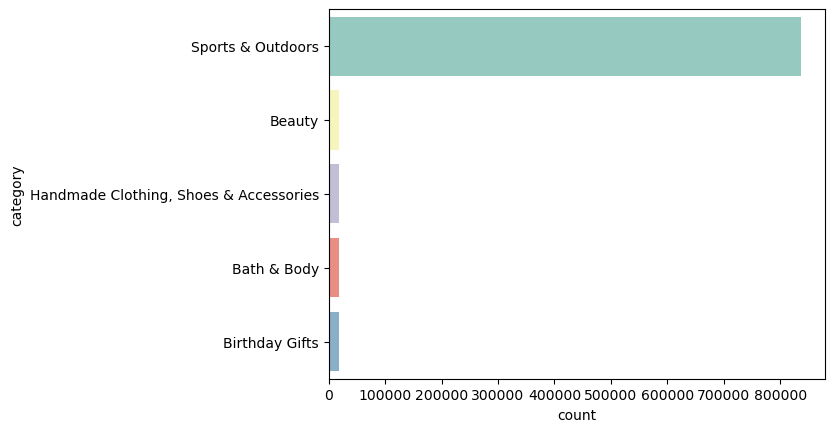

In [22]:
sns.barplot(x=df_category_freq_sorted['count'], y=df_category_freq_sorted.index, palette="Set3")
plt.show()

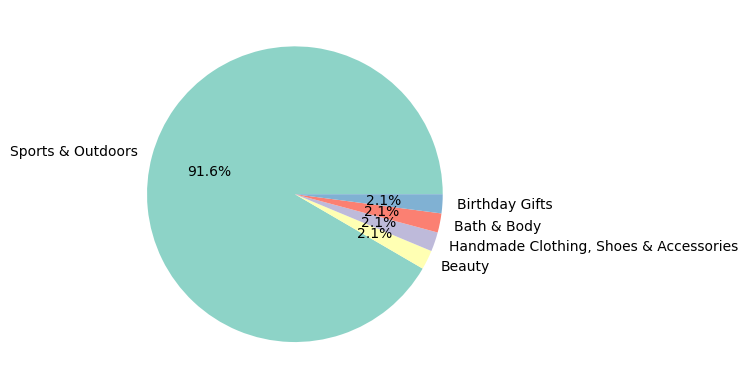

In [26]:
plt.pie(df_category_freq_sorted['count'], labels=df_category_freq_sorted.index, colors=sns.color_palette("Set3", n_colors=len(df_category_freq)), autopct='%1.1f%%')
plt.show()


In [ ]:
"""
Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

"""

In [37]:
df_category_price = df[['category', 'price']]

In [38]:
df_category_price_stats = df_category_price.groupby('category')['price'].agg(
    mean='mean',
    median='median',
    mode=lambda x: x.mode()[0]
)

In [39]:
df_category_price_stats_sorted = df_category_price_stats.sort_values(by='mean', ascending=False)

In [42]:
df_category_price_stats_sorted.round(2)

,mean,median,mode
category,,,
Laptops,1087.99,1042.72,499.00
3D Printers,1018.04,319.00,499.00
Desktop PCs,926.82,810.40,399.99
Home Office Furniture,622.14,96.97,59.99
Test & Measurement,559.38,94.77,1436.00
...,...,...,...
Bedding Accessories,8.84,7.09,7.99
Adapters,8.75,7.05,7.99
Signs & Plaques,8.28,6.99,3.99


In [43]:
average_price = df['price'].mean()

most_common_price = df['price'].mode()[0]

print(f"Average price: {average_price:.2f}")
print(f"Most common price (mode): {most_common_price:.2f}")

if average_price > most_common_price:
    print("The average price is higher than the most common price.")
elif average_price < most_common_price:
    print("The average price is lower than the most common price.")
else:
    print("The average price is the same as the most common price.")

Average price: 89.24
Most common price (mode): 9.99
The average price is higher than the most common price.


In [ ]:
"""

Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

"""

In [ ]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [ ]:
if std_dev_price > IQR_price:
    print("The prices are highly spread out, with significant variation.")
else:
    print("The prices are relatively consistent with moderate variation.")

The prices are highly spread out, with significant variation.


In [50]:
skewness_price = df['price'].skew()
kurtosis_price = df['price'].kurtosis()

skewness_price, kurtosis_price

(27.492977566280338, 4241.616412866518)

In [99]:
print(f"Skewness: {skewness_price}")
if skewness_price > 0:
    print("The distribution is right-skewed (positive skew). There are more lower prices with a few high prices.")
elif skewness_price < 0:
    print("The distribution is left-skewed (negative skew). There are more high prices with a few low prices.")
else:
    print("The distribution is approximately symmetric.")

print(f"Kurtosis: {kurtosis_price}")
if kurtosis_price > 3:
    print("The distribution has high kurtosis (leptokurtic). It has heavy tails and more outliers.")
elif kurtosis_price < 3:
    print("The distribution has low kurtosis (platykurtic). It has light tails and fewer outliers.")
else:
    print("The distribution has a kurtosis close to 3 (mesokurtic), which is typical of a normal distribution.")

Skewness: 27.492977566280338
The distribution is right-skewed (positive skew). There are more lower prices with a few high prices.
Kurtosis: 4241.616412866518
The distribution has high kurtosis (leptokurtic). It has heavy tails and more outliers.


In [ ]:
"""

Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

"""

Text(0, 0.5, 'Frequency')

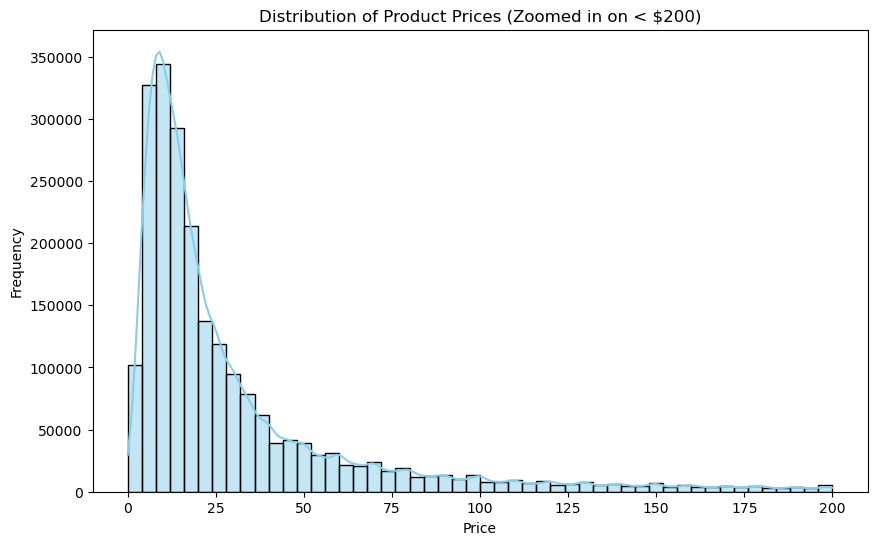

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['price'] < 200]['price'], bins=50, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Product Prices (Zoomed in on < $200)')
plt.xlabel('Price')
plt.ylabel('Frequency')

<Axes: ylabel='price'>

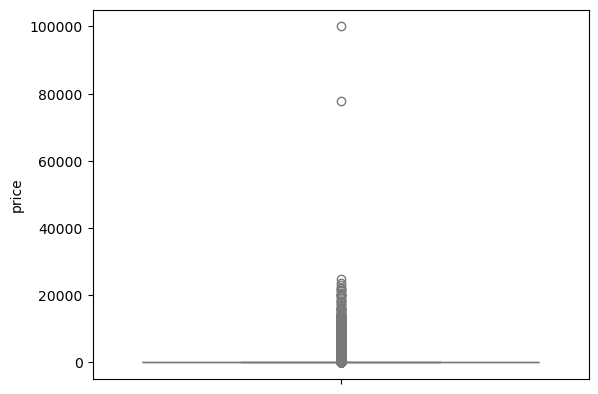

In [68]:
sns.boxplot(data = df['price'], color="lightblue")

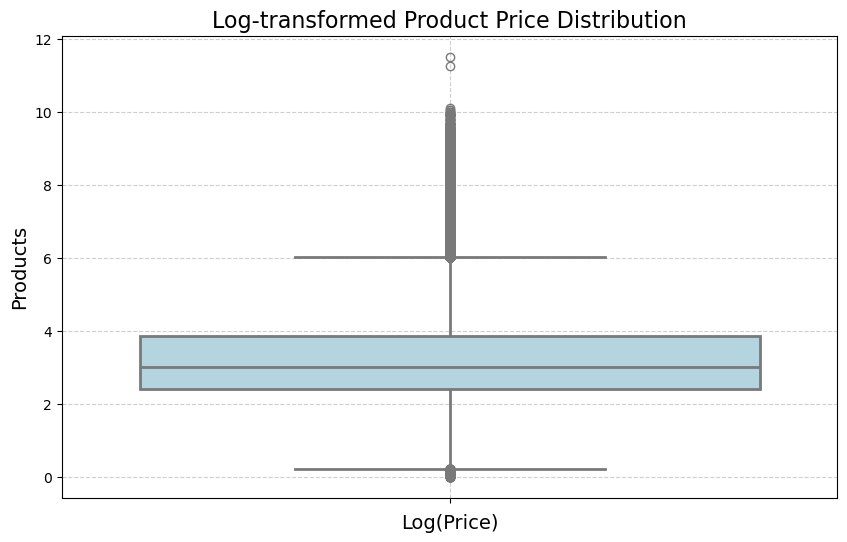

In [ ]:
df['log_price'] = np.log(df['price'] + 1)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df['log_price'], color="lightblue", linewidth=2)
plt.title('Log-transformed Product Price Distribution', fontsize=16)
plt.xlabel('Log(Price)', fontsize=14)
plt.ylabel('Products', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
"""

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

"""

In [75]:
df_category_stars_stats = df.groupby('category')['stars'].agg(
    mean='mean',
    median='median',
    mode=lambda x: x.mode()[0]
)

In [78]:
df_category_stars_stats_sorted = df_category_stars_stats.sort_values(by='mean', ascending=False)

In [80]:
df_category_stars_stats_sorted.round(2)

,mean,median,mode
category,,,
Luxury Food & Drink,4.55,4.6,4.7
Grocery,4.47,4.5,4.6
Laptop Accessories,4.45,4.6,4.6
Health & Personal Care,4.44,4.5,4.5
Arts & Crafts,4.43,4.5,4.6
...,...,...,...
Motorbike Instruments,0.17,0.0,0.0
3D Printing & Scanning,0.15,0.0,0.0
"Motorbike Handlebars, Controls & Grips",0.13,0.0,0.0


In [91]:
df_stars_mode = df['stars'].mode()[0]

In [92]:
df_stars_mode

0.0

In [ ]:
"""

Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

"""

In [94]:
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
min_stars = df['stars'].min()
max_stars = df['stars'].max()
range_stars = max_price - min_price
quantiles_stars = df['stars'].quantile([0.25, 0.5, 0.75])
Q1_stars = df['stars'].quantile(0.25)
Q3_stars = df['stars'].quantile(0.75)
IQR_stars = Q3_stars - Q1_stars
variance_stars, std_dev_stars, min_stars, max_stars, range_stars, quantiles_stars

(4.81743402976196,
 2.1948653785054697,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [95]:
if std_dev_stars > IQR_stars:
    print("The ratings are highly spread out, with significant variation.")
else:
    print("The ratings are relatively consistent with moderate variation.")

The ratings are relatively consistent with moderate variation.


In [ ]:
"""

Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

"""

In [96]:
skewness_stars = df['price'].skew()
kurtosis_stars = df['price'].kurtosis()

skewness_stars, kurtosis_stars

(27.492977566280338, 4241.616412866518)

In [97]:
print(f"Skewness: {skewness_stars}")
if skewness_stars > 0:
    print("The distribution is right-skewed (positive skew). There are more lower ratings with a few high ratings.")
elif skewness_stars < 0:
    print("The distribution is left-skewed (negative skew). There are more high ratings with a few low ratings.")
else:
    print("The distribution is approximately symmetric.")

print(f"Kurtosis: {kurtosis_stars}")
if kurtosis_stars > 3:
    print("The distribution has high kurtosis (leptokurtic). It has heavy tails and more outliers.")
elif kurtosis_stars < 3:
    print("The distribution has low kurtosis (platykurtic). It has light tails and fewer outliers.")
else:
    print("The distribution has a kurtosis close to 3 (mesokurtic), which is typical of a normal distribution.")

Skewness: 27.492977566280338
The distribution is right-skewed (positive skew). There are more lower ratings with a few high ratings.
Kurtosis: 4241.616412866518
The distribution has high kurtosis (leptokurtic). It has heavy tails and more outliers.


In [ ]:
"""

Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

"""

Text(0, 0.5, 'Frequency')

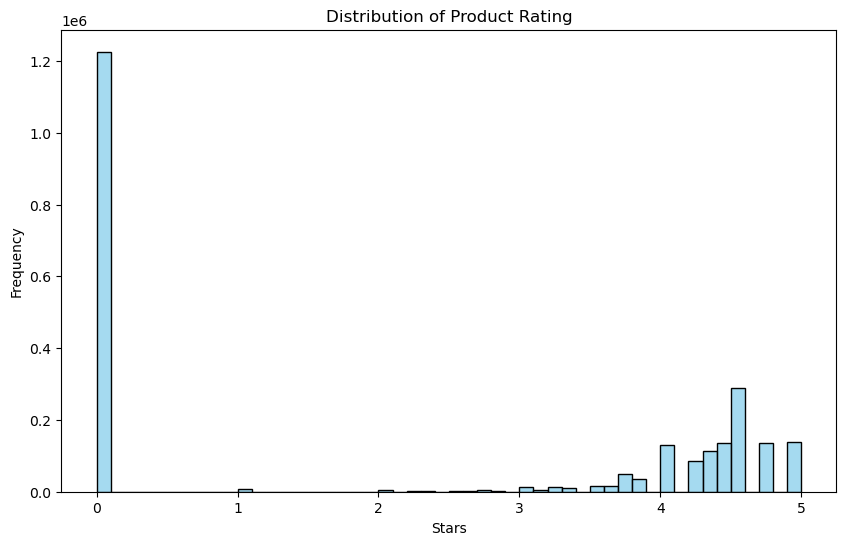

In [101]:
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=50, color='skyblue', edgecolor='black')

plt.title('Distribution of Product Rating')
plt.xlabel('Stars')
plt.ylabel('Frequency')